In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import rasterio

# 📂 Directorios base del dataset
base_dir = r"E:\Memoria\CNN\dataset_npy2"

train_images_dir = os.path.join(base_dir, "train", "images")
train_masks_dir = os.path.join(base_dir, "train", "masks")

val_images_dir = os.path.join(base_dir, "val", "images")
val_masks_dir = os.path.join(base_dir, "val", "masks")

test_images_dir = os.path.join(base_dir, "test", "images")
test_masks_dir = os.path.join(base_dir, "test", "masks")

# 🔄 Función para cargar imágenes y máscaras
def load_data(images_dir, masks_dir):
    images, masks = [], []
    img_files = sorted([f for f in os.listdir(images_dir) if f.endswith(".npy")])
    
    for img_name in img_files:
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name.replace(".npy", "_ground_truth.npy"))

        if os.path.exists(mask_path):
            img = np.load(img_path)  # Cargar imagen (6 canales)
            mask = np.load(mask_path)  # Cargar máscara

            # Asegurar que la máscara es binaria (0 y 1)
            mask = np.where(mask == 255, 1, mask).astype(np.uint8)

            images.append(img)
            masks.append(mask)
    
    return np.array(images), np.array(masks)

print("📌 Carga de funciones completada. ¡Listo para revisar los datos!")



📌 Carga de funciones completada. ¡Listo para revisar los datos!


In [28]:
# 🔍 Revisar si hay el mismo número de imágenes y máscaras
for split in ["train", "val", "test"]:
    img_dir = os.path.join(base_dir, split, "images")
    mask_dir = os.path.join(base_dir, split, "masks")

    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".npy")])
    mask_files = sorted([f.replace("_ground_truth.npy", ".npy") for f in os.listdir(mask_dir) if f.endswith(".npy")])

    print(f"📂 {split.upper()} - {len(img_files)} imágenes vs {len(mask_files)} máscaras")

    if img_files != mask_files:
        print(f"⚠️ ERROR: Las imágenes y máscaras en {split} no están alineadas. ¡Revisar nombres!")
    else:
        print(f"✅ {split.upper()} - Nombres y cantidad coinciden correctamente.")


📂 TRAIN - 31 imágenes vs 31 máscaras
✅ TRAIN - Nombres y cantidad coinciden correctamente.
📂 VAL - 12 imágenes vs 12 máscaras
✅ VAL - Nombres y cantidad coinciden correctamente.
📂 TEST - 19 imágenes vs 19 máscaras
✅ TEST - Nombres y cantidad coinciden correctamente.


In [29]:
# 🔍 Revisar las dimensiones de las imágenes y máscaras
for split in ["train", "val", "test"]:
    img_dir = os.path.join(base_dir, split, "images")
    mask_dir = os.path.join(base_dir, split, "masks")

    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".npy")])

    sample_img = np.load(os.path.join(img_dir, img_files[0]))
    sample_mask = np.load(os.path.join(mask_dir, img_files[0].replace(".npy", "_ground_truth.npy")))

    print(f"📏 {split.upper()} - Dimensiones de imagen: {sample_img.shape} | Dimensión de máscara: {sample_mask.shape}")

    if sample_img.shape[:2] != sample_mask.shape:
        print(f"⚠️ ERROR: Dimensiones de imagen y máscara no coinciden en {split}.")
    else:
        print(f"✅ {split.upper()} - Dimensiones correctas.")


📏 TRAIN - Dimensiones de imagen: (512, 512, 6) | Dimensión de máscara: (512, 512)
✅ TRAIN - Dimensiones correctas.
📏 VAL - Dimensiones de imagen: (512, 512, 6) | Dimensión de máscara: (512, 512)
✅ VAL - Dimensiones correctas.
📏 TEST - Dimensiones de imagen: (512, 512, 6) | Dimensión de máscara: (512, 512)
✅ TEST - Dimensiones correctas.


In [30]:
# 🔍 Ver valores únicos en imágenes y máscaras
for split in ["train", "val", "test"]:
    images, masks = load_data(
        os.path.join(base_dir, split, "images"),
        os.path.join(base_dir, split, "masks")
    )

    print(f"\n📊 {split.upper()} - Valores en imágenes:")
    for ch in range(6):
        print(f"  - Canal {ch+1}: Min={images[..., ch].min()}, Max={images[..., ch].max()}")

    print(f"\n📊 {split.upper()} - Valores en máscaras: {np.unique(masks)}")



📊 TRAIN - Valores en imágenes:
  - Canal 1: Min=0.0, Max=1.0
  - Canal 2: Min=0.0, Max=1.0
  - Canal 3: Min=0.0, Max=1.0
  - Canal 4: Min=0.0, Max=0.003921568859368563
  - Canal 5: Min=0.0, Max=0.003921568859368563
  - Canal 6: Min=0.0, Max=0.003921568859368563

📊 TRAIN - Valores en máscaras: [0 1]

📊 VAL - Valores en imágenes:
  - Canal 1: Min=0.0, Max=1.0
  - Canal 2: Min=0.0, Max=1.0
  - Canal 3: Min=0.0, Max=1.0
  - Canal 4: Min=0.0, Max=0.003921568859368563
  - Canal 5: Min=0.0, Max=0.003921568859368563
  - Canal 6: Min=0.0, Max=0.003921568859368563

📊 VAL - Valores en máscaras: [0 1]

📊 TEST - Valores en imágenes:
  - Canal 1: Min=0.0, Max=1.0
  - Canal 2: Min=0.0, Max=1.0
  - Canal 3: Min=0.0, Max=1.0
  - Canal 4: Min=0.0, Max=0.003921568859368563
  - Canal 5: Min=0.0, Max=0.003921568859368563
  - Canal 6: Min=0.0, Max=0.003921568859368563

📊 TEST - Valores en máscaras: [0 1]


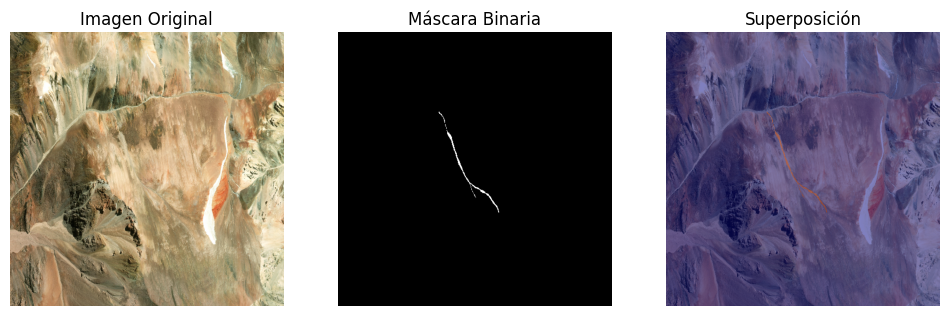

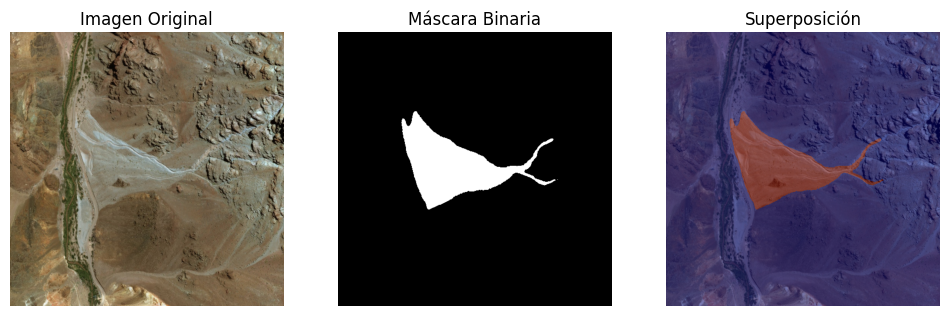

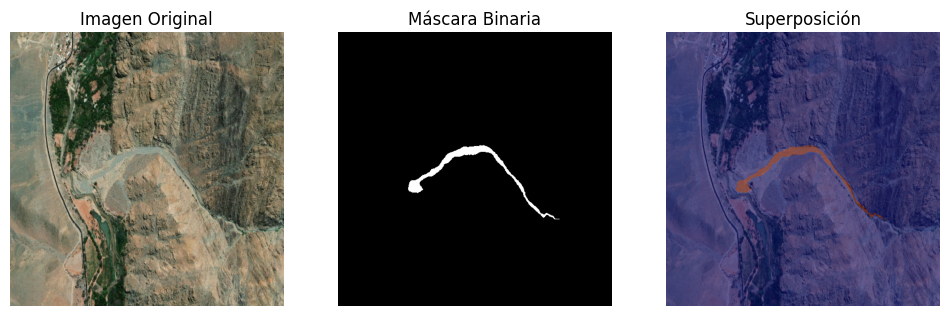

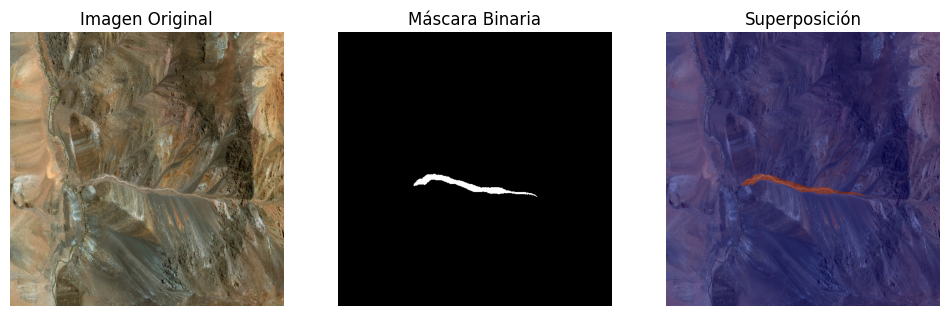

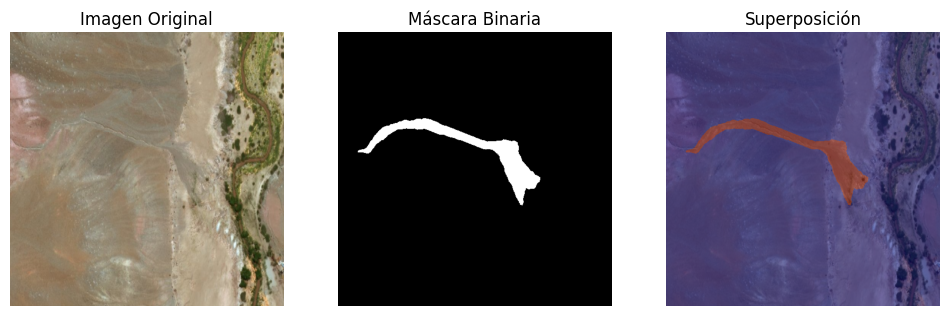

In [31]:
# 🔍 Mostrar ejemplos de imágenes y máscaras
def plot_sample(images, masks, num_samples=3):
    indices = random.sample(range(len(images)), num_samples)

    for i in indices:
        img = images[i]
        mask = masks[i]

        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        # Mostrar imagen original (RGB con 3 primeros canales)
        axes[0].imshow(img[..., :3])  
        axes[0].set_title("Imagen Original")
        axes[0].axis("off")

        # Mostrar máscara binaria
        axes[1].imshow(mask, cmap="gray")
        axes[1].set_title("Máscara Binaria")
        axes[1].axis("off")

        # Superposición de la máscara sobre la imagen
        axes[2].imshow(img[..., :3])  # Imagen RGB de fondo
        axes[2].imshow(mask, cmap="jet", alpha=0.5)  # Máscara en transparencia
        axes[2].set_title("Superposición")
        axes[2].axis("off")

        plt.show()

# 🔍 Visualizar muestras
test_images, test_masks = load_data(test_images_dir, test_masks_dir)
plot_sample(test_images, test_masks, num_samples=5)
 